In [1]:
import pandas as pd
import requests
import logging
import json
import time

logging.basicConfig(level=logging.INFO)

def getData(page, tag):

    base_url = "https://api.stackexchange.com/2.3/questions"
    params = {
        "order": "asc",
        "sort": "creation",
        "tagged": tag,
        "site": "stackoverflow",
        "pagesize": 100,
        "page": page,
        "filter": "withbody",
        "key": "rl_7G8XRSxnP5ZMRRFLme9xurK36"
    }

    try:
        response = requests.get(base_url, params=params,timeout=(10, 10))
        response.raise_for_status()
        data = response.json()

        if "items" not in data or not data["items"]:
            logging.warning("No questions found.")
            return None

        data_list = []
        for question in data["items"]:
            accepted_answer=''
            accepted_answer_score=0
            answer_id = question.get("accepted_answer_id",None)
            time.sleep(0.1)
            if answer_id:
                answers_url = f"https://api.stackexchange.com/2.3/answers/{answer_id}"
                answers_params = {
                    "site": "stackoverflow",
                    "filter": "withbody",
                    "key": "rl_7G8XRSxnP5ZMRRFLme9xurK36" 
                }
                answers_response = requests.get(answers_url, params=answers_params, timeout=(10, 10))
                answers_response.raise_for_status()
                answer = answers_response.json().get('items', [])[0]

                accepted_answer=answer.get('body', '')
                accepted_answer_score=answer.get('score', 0)
                
                data_list.append([
                    question.get('title', ''),
                    question.get('body', ''),
                    ", ".join(question.get('tags', [])),
                    accepted_answer,
                    accepted_answer_score,
                    question.get('score', 0),
                    question.get('view_count', 0),
                    pd.to_datetime(question.get('creation_date'), unit='s'),
                    question.get('link','')
                ])


        df = pd.DataFrame(data_list, columns=["Title", "Description", "Tags", "Accepted Answer", "Answer Score", "Question Score", "Question Views", "Creation Time", "Link"])
        
        file_name = "questions_data_regex.csv"

        with open(file_name, 'a', encoding='utf-8', newline='') as f:
              df.to_csv(f, header=None, encoding='utf-8', index=False)

    except requests.exceptions.RequestException as req_e:
        logging.error(f"Request failed: {req_e}")
    except json.JSONDecodeError as json_e:
         logging.error(f"Failed to decode JSON response: {json_e}")
    except Exception as e:
        logging.error(f"Unexpected error: {e}")
    return True


In [2]:
#100 results for each page, total questions: around 21,000
for page in range(99,200):
    result = getData(page,'regex')
    print(page)
    if result is None:
        break
    time.sleep(2)
    

99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124


ERROR:root:Unexpected error: list index out of range


125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146


ERROR:root:Request failed: HTTPSConnectionPool(host='api.stackexchange.com', port=443): Read timed out. (read timeout=10)


147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172


ERROR:root:Request failed: HTTPSConnectionPool(host='api.stackexchange.com', port=443): Read timed out. (read timeout=10)


173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199


78193


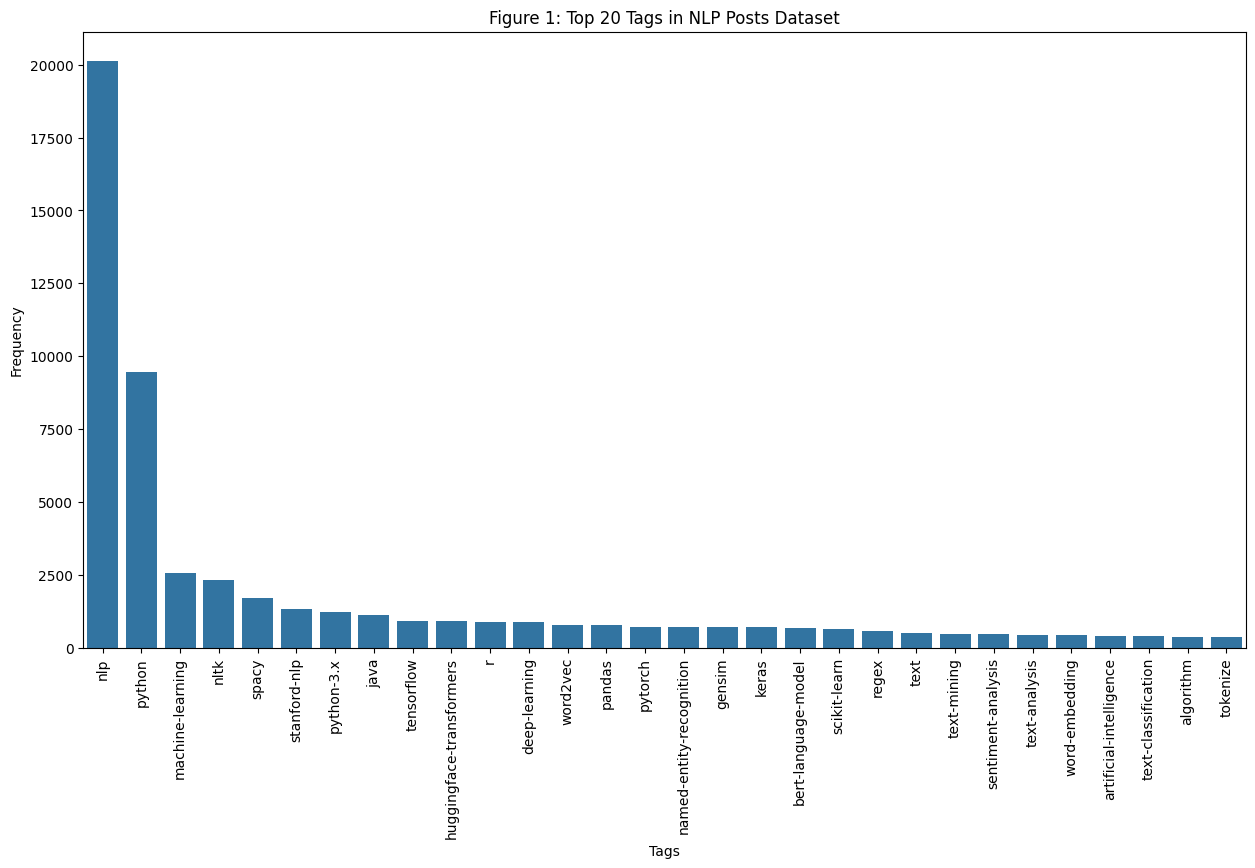

In [6]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('questions_data_nlp- Final.csv')

tags_list=[]

tags = df['Tags']

for question in tags:
    try:
        for each_tag in question.split(','):
            tags_list.append(each_tag.strip())
    except:
        pass
print(len(tags_list))

unique, counts = np.unique(np.array(tags_list), return_counts=True)

df_word_freq = pd.DataFrame({'Tags': unique,'Frequency': counts})

#the sort_values function will order the dataframe by frequency
df_word_freq = df_word_freq.sort_values('Frequency', ascending=False)

#seaborn library bar chart of the top 30 tokens
plt.figure(figsize=(15, 8))
sns.barplot(data=df_word_freq.head(30), x='Tags', y='Frequency')
plt.title('Figure 1: Top 20 Tags in NLP Posts Dataset')
plt.xticks(rotation=90)
plt.show()